# Multiclass Classification Project
- How to read different size images from a directory?
- How to implement one vs one scheme for Multiclass classification?
- How to use SVM for image classification?

## Dataset Preperation

In [1]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# it will set a path to a directory
p = Path("Datasets/Images/images")

# It will access all('*') the directory present inside the "/images"
dirs = p.glob("*")

labels_dict ={"cat":0,"dog":1,"horse":2,"human":3}

image_data =[]
labels=[]

# to iterate over all the directory inside the /images
for folder_dir in dirs:
    
    #print(folder_dir)
    
    # str => it is converting foldername to String 
    # .split('/') => it is spliting the whole String where ever the '/' sign comes
    #[-1] => it indicates the last element of the list
    #[:-1] => it is removing the last charater from the word('dogs' => 'dog')
    
    label = str(folder_dir).split("/")[-1][:-1]
    
    #print(label)
    
    
    for img_path in folder_dir.glob("*.jpg"):
        
        #print(img_path)
        
        # target_size => it makes each and every img have a size of(32,32)
        img  = image.load_img(img_path,target_size=(32,32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])
        
        

In [3]:
print(len(image_data))
print(len(labels))

808
808


In [26]:
print(labels)

[2 2 0 1 3 2 3 3 0 0 2 1 2 0 2 3 0 0 1 3 2 3 3 2 2 1 1 0 1 2 2 1 3 0 2 2 2
 3 0 0 1 0 1 1 2 2 0 3 0 3 0 2 0 2 3 0 1 2 2 1 0 2 3 0 2 1 0 0 0 3 2 3 1 1
 2 3 1 1 0 1 0 1 2 2 2 0 1 3 2 0 1 1 2 0 3 1 0 0 2 1 2 1 2 3 2 3 3 2 0 0 3
 0 2 3 3 1 1 0 1 0 1 3 0 0 2 2 2 3 2 2 0 0 1 3 3 1 1 1 0 0 1 1 3 2 0 2 0 0
 0 2 1 0 3 1 3 0 2 0 3 1 3 2 3 2 1 0 2 1 2 0 1 1 1 1 0 0 1 2 3 0 1 0 1 0 2
 2 0 0 1 1 2 2 3 0 0 1 3 0 0 0 0 0 3 2 1 0 1 2 2 0 1 2 0 3 0 1 0 0 2 3 3 2
 3 3 1 0 1 3 1 2 3 2 1 1 0 1 2 2 3 3 0 2 3 2 1 1 3 0 1 1 1 2 3 2 3 3 3 3 0
 0 2 2 3 0 1 3 0 3 2 2 2 0 0 2 3 0 3 3 1 1 3 1 0 1 2 0 0 1 1 1 2 3 2 3 2 2
 3 3 3 1 3 0 3 2 0 0 2 1 1 2 3 3 1 1 0 2 2 0 1 2 0 1 2 3 1 1 2 3 2 1 2 1 1
 3 0 3 0 0 1 0 0 1 1 3 2 2 0 1 3 1 0 1 2 3 0 3 1 3 2 2 1 2 1 1 1 3 2 2 3 1
 1 3 3 0 0 3 3 0 0 0 2 2 2 1 2 0 3 2 3 0 3 0 3 2 0 1 3 1 2 3 2 0 1 0 1 3 0
 0 0 1 1 1 1 2 2 0 0 2 2 1 3 3 1 1 0 3 3 3 0 3 2 3 3 2 0 2 2 1 3 0 1 1 1 1
 2 0 1 1 0 2 0 1 3 0 2 0 3 0 1 3 2 0 1 0 1 0 1 3 1 1 0 0 1 2 0 1 3 0 2 1 2
 2 2 1 3 3 2 2 2 1 3 1 1 

In [5]:
# Convert this into numpy array
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)
print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


### Randomly Shuffle our data

In [6]:
import random

combined = list(zip(image_data,labels))
random.shuffle(combined)

# Unzip

image_data[:],labels[:] = zip(*combined)

### Visualise this data

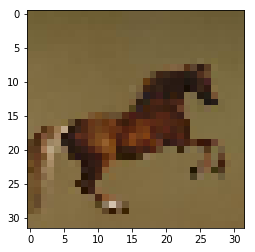

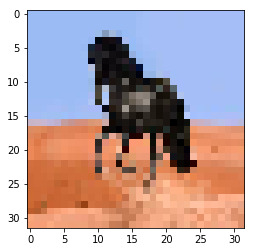

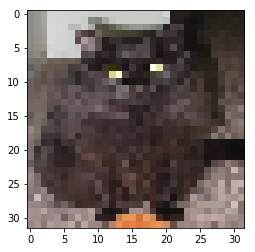

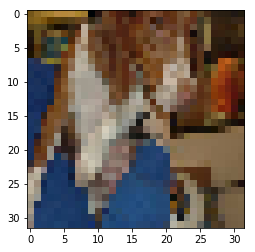

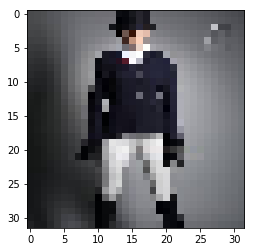

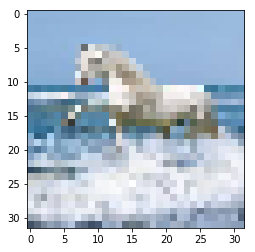

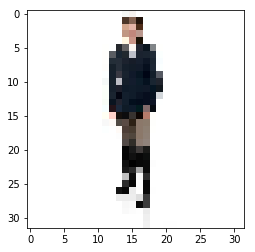

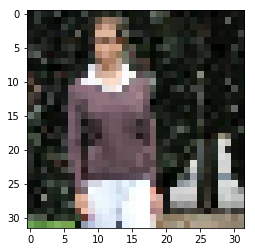

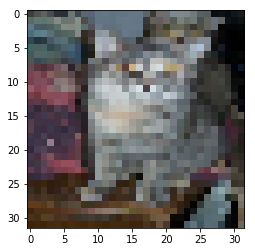

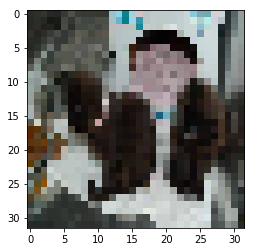

In [7]:
def drawImg(img):
    plt.imshow(img)
    plt.show()
    return

for i in range(10):
    drawImg(image_data[i])

### SVM Classifier

In [8]:
class SVM:
    
    def __init__(self,C=1.0):
        
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        
        loss =0
        
        loss += .5*np.dot(W,W.T)
        
        
        
        m = X.shape[0]
        
        for i in range(m):
            
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            
            loss += self.C*max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,max_Itr = 300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n= learning_rate
        c = self.C
        
        #Init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        #print(self.hingeLoss(W,bias,X,Y))
        
        # Training from here
        # Weight and Bais Update rule
        
        losses = []
        
        for i in range(max_Itr):
            
            # Training Loop
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Batch Gradient Decent(Research Paper) with random shuffling
            
            for batch_start in range(0,no_of_samples,batch_size):
                
                #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in mini batch
                
                for j in range(batch_start,batch_start + batch_size):
                    if j<no_of_samples: 
                        i= ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                    
                        if ti >1:
                            gradw += 0
                            gradb += 0
                        
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                        
                    # Gradient for the batch is ready! Update W,B
                
                W = W - n*W +n*gradw
                bias = bias + n*gradb
                
        self.W = W
        self.b = bias
        return W,bias,losses
            
    

## We need to convert data for one-for-one classification!

In [9]:
M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(808, 3072)
(808,)


In [10]:
CLASSES = len(np.unique(labels))
print(CLASSES)

4


In [11]:
def classWiseData(x,y):
    data = {}
    
    for i in range(CLASSES):
        data[i] = []
        
    for i in range(x.shape[0]):
        
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k] = np.array(data[k])
        
    
    return data

In [12]:
data = classWiseData(image_data,labels)

In [13]:
print(data[0].shape[0])
print(data[1].shape[0])
print(data[2].shape[0])
print(data[3].shape[0])

202
202
202
202


In [14]:
def getDataPairForSVM(d1,d2):
    
    """This function combines data of two classes into a single matrix"""
    
    
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    
    return data_pair,data_labels

## Training NC2 SVM's Part

In [15]:
mySVM = SVM()

In [16]:
def trainSVMs(x,y):
    
    svm_classifiers = {}
    
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair)
            svm_classifiers[i][j] = (wts,b)
            
        
    return svm_classifiers

In [17]:
svm_classifiers = trainSVMs(image_data,labels)

In [18]:
# Parameters for Cats and Dogs

cats_dogs = svm_classifiers[0][1]

print(cats_dogs[0].shape)
print(cats_dogs[1])

(1, 3072)
-0.27800000000000036


## Prediction

In [19]:
def binaryPredict(x,w,b):
    
    z = np.dot(x,w.T) + b
    if z>=0:
        return 1 
    else:
        return -1

In [20]:
def predict(x):
    
    count = np.zeros((CLASSES))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            
            w,b = svm_classifiers[i][j]
            # Take a majority prediction
            
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
                
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction
    #return   

In [33]:
print(predict(image_data[2]))

print(labels[2])

0
0


In [31]:
def accuracy(x,y):
    
    count =0 
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction == y[i]):
            count +=1
            
    return count/x.shape[0]

In [32]:
accuracy(image_data,labels)

0.3650990099009901